In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_digits
digits= load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
# %matplotlib inline
import matplotlib.pyplot as plt

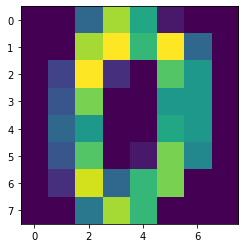

In [6]:
plt.imshow(digits.images[0])

In [12]:
import pandas as pd
df= pd.DataFrame(digits.data, columns= digits.feature_names)
df['target']= digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [14]:
X= df.drop('target', axis= 'columns')
y= df.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X, y, test_size=0.2)
len(X_train)

1437

In [16]:
modelSVC= SVC()
modelSVC.fit(X_train, y_train)

SVC()

In [17]:
modelSVC.score(X_test, y_test)

0.9916666666666667

Using cross validation to test out models with varied chunks of the datasets

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X,y)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [19]:
cross_val_score(RandomForestClassifier(),X,y)

array([0.93611111, 0.9       , 0.95264624, 0.95543175, 0.92200557])

In [21]:
cross_val_score(GaussianNB(),X,y)

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

In [42]:
cross_val_score(LogisticRegression(solver='liblinear'), X,y)

array([0.92222222, 0.88333333, 0.95264624, 0.95821727, 0.89415042])

In [24]:
#using grid search CV

from sklearn.model_selection import GridSearchCV


In [39]:
model_params= {
    'svm': {
        'model':SVC(),
        'params': {
            'C': [1,20,50,100],
            'kernel': ['rbf', 'poly', 'linear']
        }
    },
    'randomForest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[10,20,100]
        }
    },
    'logisticRegression':{
        'model':LogisticRegression(solver='liblinear'),
        'params': {}
    },
    'gausianNB': {
        'model': GaussianNB(),
        'params': {}
    }, 
    'multinomialNB': {
        'model':MultinomialNB(),
        'params':{}
    },
    'decision_tree': {
        'model':DecisionTreeClassifier(),
        'params':{'criterion': ['gini','entropy']}
    }
    
    
}

In [40]:
scores= []
for model, mp in model_params.items():
    clf=  GridSearchCV(mp['model'], mp['params'], cv= 5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model':model,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [41]:
df_final= pd.DataFrame(scores)
df_final

,model,best_score,best_params
0,svm,0.973850,"{'C': 20, 'kernel': 'rbf'}"
1,randomForest,0.937136,{'n_estimators': 100}
2,logisticRegression,0.922114,{}
3,gausianNB,0.806928,{}
4,multinomialNB,0.870350,{}
5,decision_tree,0.801920,{'criterion': 'entropy'}


In [46]:
#using SVM to predict since it has the best score.



,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1156,0.0,3.0,16.0,9.0,2.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,2.0,11.0,12.0,14.0,4.0,0.0,0.0
344,0.0,0.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,5.0,10.0,12.0,15.0,7.0,0.0
1165,0.0,1.0,10.0,9.0,11.0,5.0,0.0,0.0,1.0,14.0,...,2.0,0.0,0.0,0.0,9.0,13.0,16.0,9.0,0.0,0.0


In [48]:
modelSVC.predict(X_test[:3])

array([8, 6, 8])

In [49]:
y_test[:3]

1156    8
344     6
1165    8
Name: target, dtype: int32